In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score

In [2]:
# loading dataset

df = pd.read_csv("dataframe_.csv")

In [3]:
# top five rows

df.head()

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


In [4]:
# last five rows

df.tail()

,input,output
1692,25.410184,-76.380902
1693,29.537304,-82.796934
1694,31.633331,-87.000000
1695,29.091458,-104.943052
1696,17.145296,-101.726894


In [5]:
# random ten sample row

df.sample(10)

,input,output
12,-114.100895,-117.674002
1422,91.849104,35.543284
746,-74.209624,-19.805932
1237,-50.366669,-39.000000
1096,-124.366669,121.000000
1414,70.029493,-18.117029
409,65.595074,-5.088154
558,52.247302,-51.925792
264,34.371488,-43.830488
1494,63.622544,-19.530370


In [6]:
# total rows

df.shape

(1697, 2)

In [7]:
# printing the formation of data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 26.6 KB


In [8]:
# checking null value

df.isnull().sum()

input     1
output    1
dtype: int64

In [9]:
# droping null values

df = df.dropna()

In [10]:
df.isnull().sum()

input     0
output    0
dtype: int64

In [11]:
df.duplicated().sum()

606

In [12]:
# checking the percentage of duplicated columns

df.duplicated().sum()/df.shape[0]*100

35.7311320754717

In [13]:
df = df.drop_duplicates()

In [14]:
df.isnull().sum()

input     0
output    0
dtype: int64

In [15]:
df.shape

(1090, 2)

In [16]:
# checking the statistical description

df.describe()

,input,output
count,1090.000000,1090.000000
mean,8.116185,-27.383628
std,78.769201,68.371895
min,-134.962839,-132.422167
25%,-51.041357,-76.994298
50%,17.462087,-46.300938
75%,76.481078,5.113101
max,134.605775,134.425495


In [17]:
df.corr()

,input,output
input,1.000000,0.504471
output,0.504471,1.000000


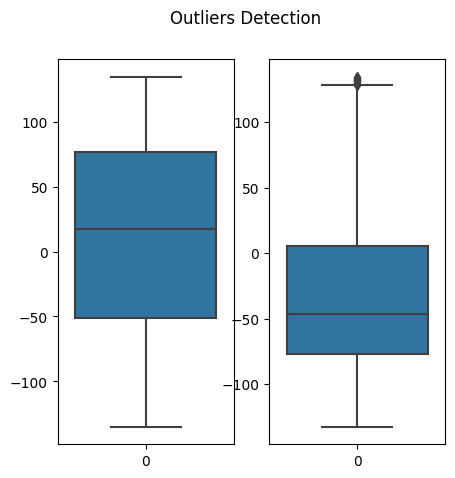

In [18]:
# outliears Detection & Handling

plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
sns.boxplot(df['input'])

plt.subplot(1,2,2)
sns.boxplot(df['output'])

plt.suptitle("Outliers Detection")
plt.show()

In [19]:
# Finding the IQR
percentile25 = df['output'].quantile(0.25)
percentile75 = df['output'].quantile(0.75)

In [20]:
percentile25, percentile75

(-76.99429755, 5.113101206750001)

In [21]:
iqr = percentile75 - percentile25

In [22]:
iqr

82.10739875675

In [23]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [24]:
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 128.274199341875
Lower limit -200.155395685125


In [25]:
# finding outliers

df[df['output'] < lower_limit]

,input,output


In [26]:
df[df['output'] < lower_limit]

,input,output


In [27]:
# Trimming the outliers

new_df = df[df['output'] < upper_limit]

In [28]:
new_df.shape

(1074, 2)

C:\Users\Admin\AppData\Local\Temp\ipykernel_7272\2667092276.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['output'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_7272\2667092276.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['output'])


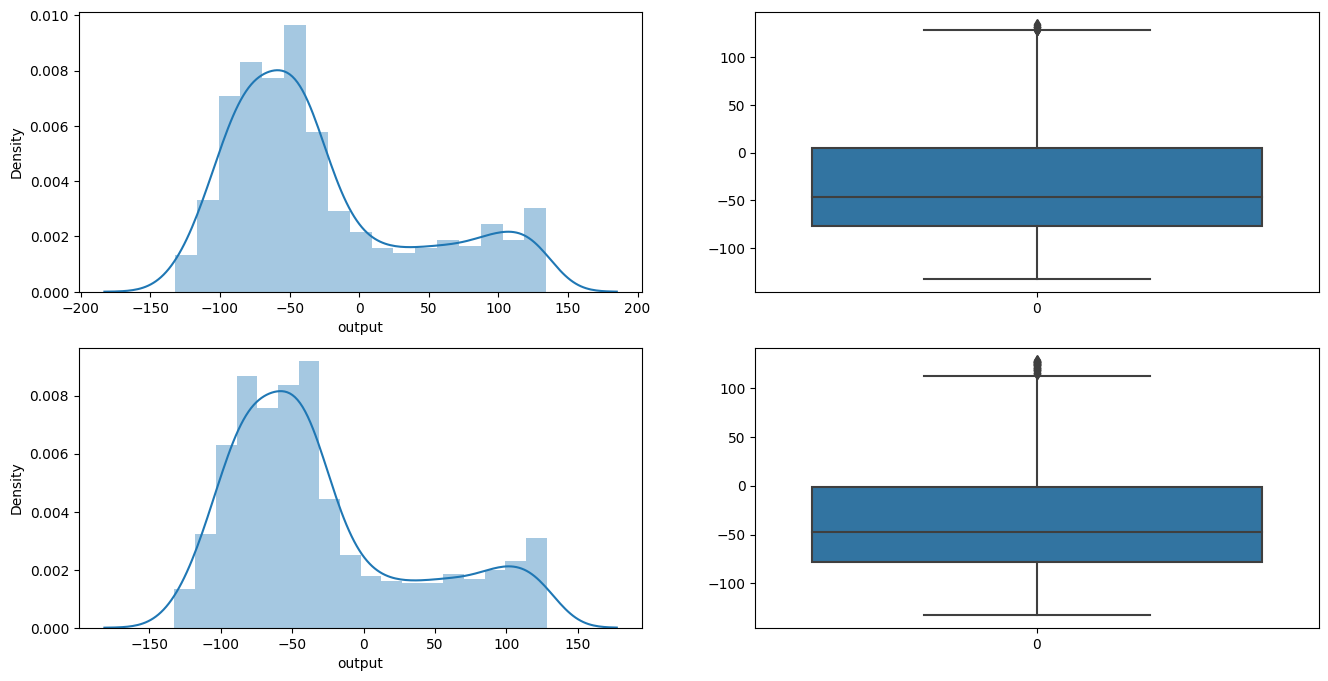

In [29]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['output'])

plt.subplot(2,2,2)
sns.boxplot(df['output'])

plt.subplot(2,2,3)
sns.distplot(new_df['output'])

plt.subplot(2,2,4)
sns.boxplot(new_df['output'])

plt.show()

In [30]:
# capping the outliers

new_df_cap = df.copy()

new_df_cap['output'] = np.where(
    new_df_cap['output'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['output'] < lower_limit,
        lower_limit,
        new_df_cap['output']
    )
)

In [31]:
new_df_cap.shape

(1090, 2)

C:\Users\Admin\AppData\Local\Temp\ipykernel_7272\2246909757.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['output'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_7272\2246909757.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_cap['output'])


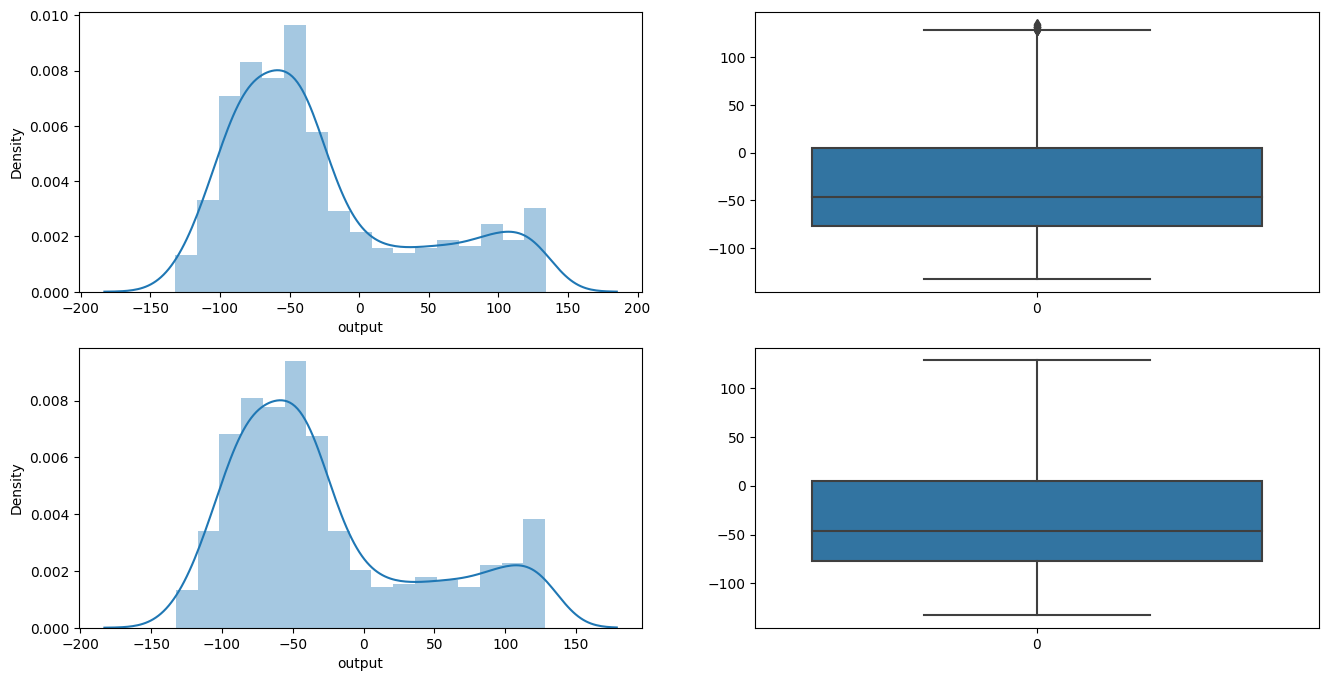

In [32]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['output'])

plt.subplot(2,2,2)
sns.boxplot(df['output'])

plt.subplot(2,2,3)
sns.distplot(new_df_cap['output'])

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['output'])

plt.show()

## Splitting the data 

In [33]:
X=new_df_cap.iloc[:,:-1].values
y=new_df_cap.iloc[:,-1]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

In [35]:
lr = LinearRegression()

In [37]:
lr.fit(X_train, y_train)

LinearRegression()

In [38]:
lr.score(X_test, y_test)

0.25456532353607786

In [39]:
lr.coef_ # slope

array([0.43682528])

In [40]:
lr.intercept_

-30.055705969373683

In [43]:
print("Training Accuracy",lr.score(X_train,y_train))
print("Test Accuracy",lr.score(X_test,y_test))

Training Accuracy 0.25436791084435073
Test Accuracy 0.25456532353607786
